# Introduction

In this notebook I will introduce basic image operations using the OpenCV library.

# Check dependencies

In the following some libraries are needed:

In [1]:
import cv2
print(cv2.__version__)

import matplotlib
print(matplotlib.__version__)

4.5.1
3.3.2


# Load test image

In [2]:
fname = "on_the_highway_a7.png"
img = cv2.imread(fname)

In [3]:
type(img)

numpy.ndarray

In [4]:
img.shape

(836, 1493, 3)

In [9]:
len( img[0,:,0] )

1493

In [11]:
img[0,0,:]

array([182, 111,  70], dtype=uint8)

# Display the test image

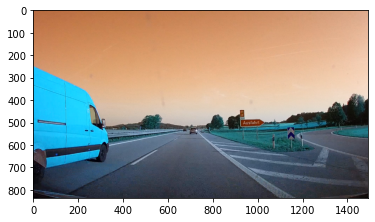

In [10]:
import matplotlib.pyplot as plt

plt.imshow(img)

Ups! The colors are strange. Actually the sky should be blue!

# Convert from BGR to RGB color channel order

In [12]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [13]:
img[0,0,:]

array([ 70, 111, 182], dtype=uint8)

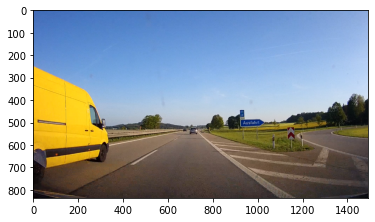

In [14]:
plt.imshow(img)

# Set display size

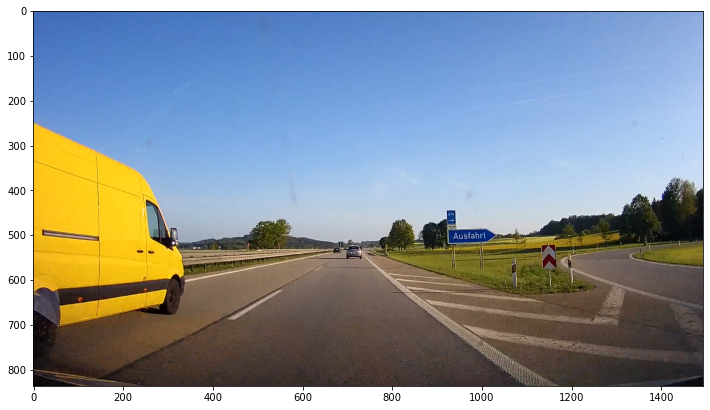

In [20]:
def show_image(img, pixel_size_in_inch=0.015):
    fig_height_inch = int(img.shape[0] * pixel_size_in_inch)
    fig_width_inch  = int(img.shape[1] * pixel_size_in_inch)
    plt.figure(figsize=(fig_height_inch,fig_width_inch))
    plt.imshow(img)
    
show_image(img)

# Show each color channel separately

(836, 1493)


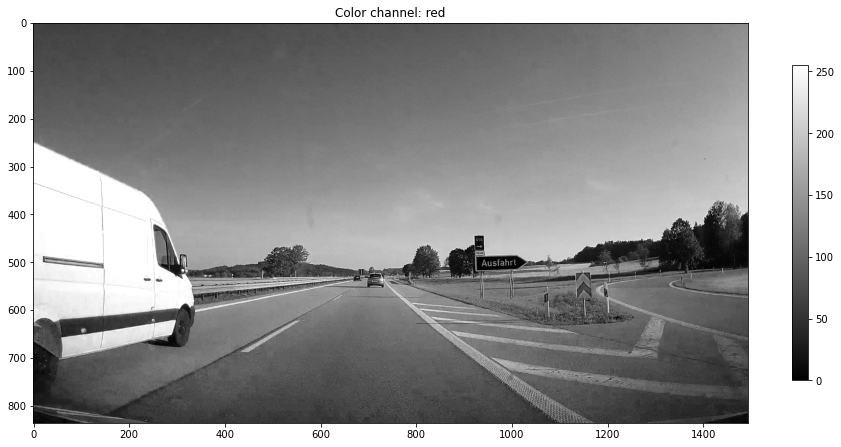

(836, 1493)


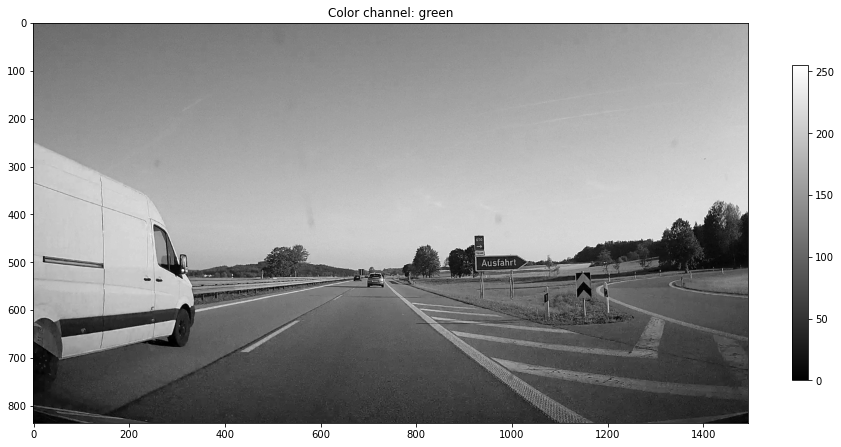

(836, 1493)


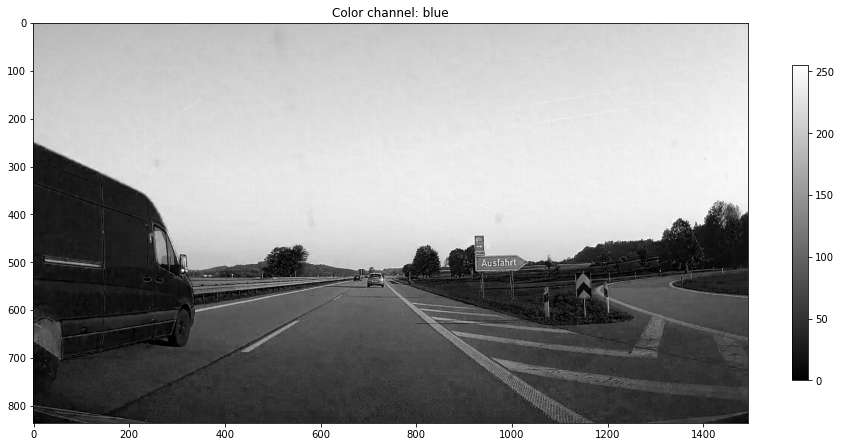

In [32]:
pixel_size_in_inch = 0.02
fig_height_inch = int(img.shape[0] * pixel_size_in_inch)
fig_width_inch  = int(img.shape[1] * pixel_size_in_inch)

color_names = ["red", "green", "blue"]

for channel_nr in range(0,3):
    channel = img[:,:,channel_nr]
    print(channel.shape)

    plt.figure(figsize=(fig_height_inch,fig_width_inch))
    plt.title("Color channel: {0}".format(color_names[channel_nr]))
    plt.imshow(channel, cmap="gray")
    
    
    cb = plt.colorbar(shrink=0.2)
    cb.ax.tick_params(labelsize=10)
    
    plt.show()

# Get a small image patch

In [47]:
n = 50
img_patch = img[300:300+n,0:n,:]

In [48]:
type(img_patch)

numpy.ndarray

In [49]:
img_patch.shape

(50, 50, 3)

In [50]:
img_patch.ndim

3

In [51]:
img_patch.size

7500

In [52]:
img_patch

array([[[255, 200,  22],
        [255, 200,  23],
        [255, 200,  24],
        ...,
        [255, 212,  34],
        [255, 209,  31],
        [255, 207,  29]],

       [[255, 200,  22],
        [255, 200,  23],
        [255, 200,  24],
        ...,
        [255, 200,  23],
        [255, 204,  27],
        [255, 205,  28]],

       [[255, 200,  22],
        [255, 200,  23],
        [255, 200,  24],
        ...,
        [250, 191,  14],
        [251, 192,  15],
        [255, 196,  19]],

       ...,

       [[255, 198,  26],
        [255, 198,  26],
        [255, 199,  27],
        ...,
        [255, 203,  26],
        [255, 204,  26],
        [255, 205,  28]],

       [[255, 198,  26],
        [255, 197,  26],
        [255, 196,  24],
        ...,
        [255, 220,  44],
        [255, 218,  42],
        [255, 210,  34]],

       [[255, 198,  26],
        [255, 197,  26],
        [255, 197,  25],
        ...,
        [227, 168,   0],
        [255, 202,  27],
        [255, 215,  40]]

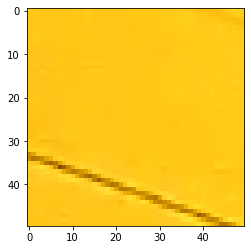

In [53]:
plt.imshow(img_patch)

# Convert color image to gray-scale image

In [54]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [55]:
img_gray.shape

(836, 1493)

In [56]:
img_gray.ndim

2

In [57]:
img_gray.size

1248148

In [58]:
836*1493

1248148

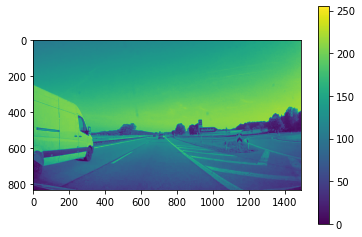

In [59]:
plt.imshow(img_gray)
plt.colorbar()

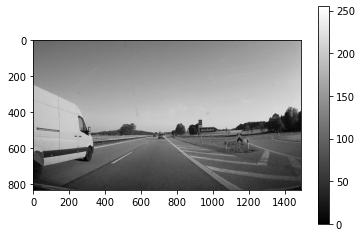

In [60]:
plt.imshow(img_gray, cmap="gray")
plt.colorbar()

Some links regarding the question how to convert a RGB color image to a gray-scale image:
   * OpenCV documentation regarding RGB<->GRAY: https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html
   * "Grayscale/RGB Conversion" at tutorialspoint: https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm

# Trying to convert the color image to gray-scale by our own

## Approach that does not work (numerical problems)

In [61]:
img_gray2 = (img[:,:,0] + img[:,:,1] + img[:,:,2])/3

In [62]:
img_gray2.shape

(836, 1493)

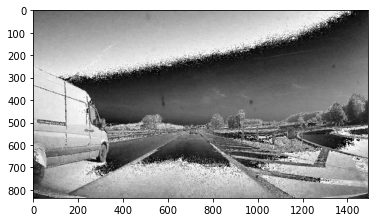

In [63]:
plt.imshow(img_gray2, cmap="gray")

In [64]:
img_gray2.dtype

dtype('float64')

In [65]:
img_gray2[0,0]

35.666666666666664

In [66]:
img_gray2.min()

0.0

In [67]:
img_gray2.max()

85.0

In [68]:
img.dtype

dtype('uint8')

In [69]:
img[300,0,:]

array([255, 200,  22], dtype=uint8)

In [70]:
img_tmp = img[:,:,0] + img[:,:,1] + img[:,:,2]

In [71]:
img_tmp.dtype

dtype('uint8')

In [72]:
img_tmp[300,0]

221

In [73]:
255+200+22

477

In [74]:
(255+200+22) % 256

221

In [75]:
(255+200) % 256

199

## Approach that works

In [76]:
img_gray3 = (img[:,:,0]*0.33 + img[:,:,1]*0.33 + img[:,:,2]*0.33)

In [77]:
img_gray3.shape

(836, 1493)

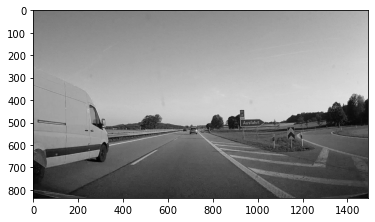

In [78]:
plt.imshow(img_gray3, cmap="gray")

Hier nochmal das Ergebnis der RGB zu Graustufenkonvertierung von der OpenCV:

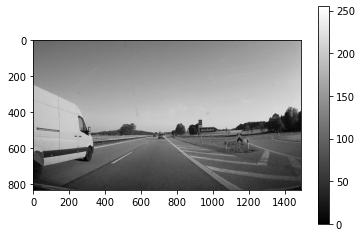

In [80]:
plt.imshow(img_gray, cmap="gray")
plt.colorbar()

## Approach that uses different weighting coefficients

In [81]:
img_gray4 = (img[:,:,0]*0.299 + img[:,:,1]*0.587 + img[:,:,2]*0.114)

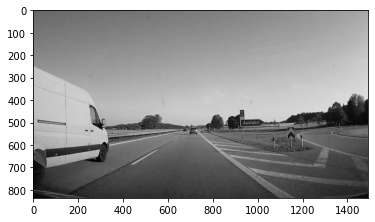

In [82]:
plt.imshow(img_gray4, cmap="gray")